In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_excel("../data/Volve production data.xlsx")
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


### Q1: What is the contribution of each well in oil , gas , water production ?

In [17]:
# grouping by each well 
d = df.groupby("NPD_WELL_BORE_NAME")[["BORE_OIL_VOL","BORE_WAT_VOL","BORE_GAS_VOL"]].sum().drop(index="15/9-F-4")
d

,BORE_OIL_VOL,BORE_WAT_VOL,BORE_GAS_VOL
NPD_WELL_BORE_NAME,,,
15/9-F-1 C,177709.33,207302.39,2.644092e+07
15/9-F-11,1147849.10,1090806.27,1.743105e+08
15/9-F-12,4579609.55,6833320.37,6.675423e+08
15/9-F-14,3942233.39,7121249.74,5.780095e+08
15/9-F-15 D,148518.56,52366.40,2.250535e+07
15/9-F-5,41160.68,13533.18,6.561826e+06


In [21]:
# percent
d["BORE_OIL_VOL"] =  ( d["BORE_OIL_VOL"]  / sum(d["BORE_OIL_VOL"] ) ) *100
d["BORE_WAT_VOL"] = (d["BORE_WAT_VOL"]  / sum(d["BORE_WAT_VOL"] ) ) *100
d["BORE_GAS_VOL"] = (d["BORE_GAS_VOL"]  / sum(d["BORE_GAS_VOL"] )) *100

def formatt(x):
    return str(round(x, 2) ) + " %"
d.applymap(formatt)

,BORE_OIL_VOL,BORE_WAT_VOL,BORE_GAS_VOL
NPD_WELL_BORE_NAME,,,
15/9-F-1 C,1.77 %,1.35 %,1.79 %
15/9-F-11,11.44 %,7.12 %,11.81 %
15/9-F-12,45.63 %,44.61 %,45.25 %
15/9-F-14,39.28 %,46.49 %,39.18 %
15/9-F-15 D,1.48 %,0.34 %,1.53 %
15/9-F-5,0.41 %,0.09 %,0.44 %


In [20]:
str (round(1.7777 , 2) ) + " %"

'1.78 %'

### Q2: Remove repeated pattern in well_bore_code column ?

In [22]:
# unique valeus
df["WELL_BORE_CODE"].unique()

array(['NO 15/9-F-1 C', 'NO 15/9-F-11 H', 'NO 15/9-F-12 H',
       'NO 15/9-F-14 H', 'NO 15/9-F-15 D', 'NO 15/9-F-4 AH',
       'NO 15/9-F-5 AH'], dtype=object)

In [23]:
# using replace
df["WELL_BORE_CODE"].str.replace("NO 15/9-F-","")

0         1 C
1         1 C
2         1 C
3         1 C
4         1 C
         ... 
15629    5 AH
15630    5 AH
15631    5 AH
15632    5 AH
15633    5 AH
Name: WELL_BORE_CODE, Length: 15634, dtype: object

In [25]:
# using slice
df["WELL_BORE_CODE"].str.slice(10)

0         1 C
1         1 C
2         1 C
3         1 C
4         1 C
         ... 
15629    5 AH
15630    5 AH
15631    5 AH
15632    5 AH
15633    5 AH
Name: WELL_BORE_CODE, Length: 15634, dtype: object

### Q3: For Every month in the data , What is the average oil production ?

In [27]:
# the wrong concept
df.groupby(df["DATEPRD"].dt.month)["BORE_OIL_VOL"].mean()

DATEPRD
1     1269.587872
2     1137.495135
3     1008.646520
4     1063.245814
5     1134.497449
6     1071.916734
7      907.791205
8      891.570235
9     1008.243140
10    1236.836227
11    1290.273926
12    1235.506605
Name: BORE_OIL_VOL, dtype: float64

In [30]:
# gouping with two index
df["month"] = df["DATEPRD"].dt.month
df["year"] = df["DATEPRD"].dt.year
( df.groupby(["year","month"])["BORE_OIL_VOL"].mean() ).to_frame()

BORE_OIL_VOL
year month              
2007 9               NaN
     10              NaN
     11              NaN
     12              NaN
2008 1               NaN
...                  ...
2016 8        160.997806
     9        101.284471
     10              NaN
     11              NaN
     12              NaN

[112 rows x 1 columns]

In [31]:
# rasampling the date column
df["monthly_date"] = df["DATEPRD"].dt.to_period('M')

In [33]:
d= df.groupby("monthly_date")["BORE_OIL_VOL"].mean()

<AxesSubplot:xlabel='monthly_date'>

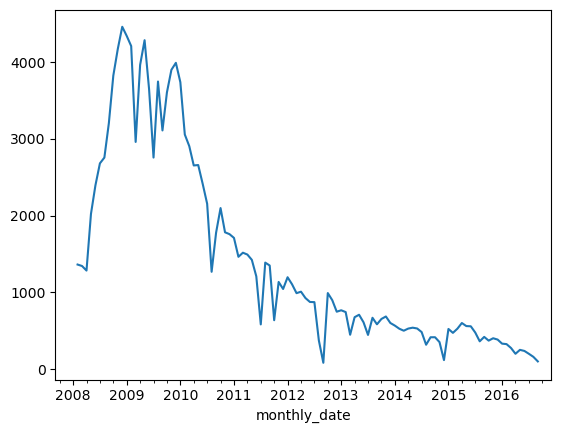

In [34]:
d.plot()

## Best Questions asked ?

#### Which wells are injector and which are producers

In [35]:
df.groupby(["WELL_BORE_CODE"])["FLOW_KIND"].unique()

WELL_BORE_CODE
NO 15/9-F-1 C                [production]
NO 15/9-F-11 H               [production]
NO 15/9-F-12 H               [production]
NO 15/9-F-14 H               [production]
NO 15/9-F-15 D               [production]
NO 15/9-F-4 AH                [injection]
NO 15/9-F-5 AH    [injection, production]
Name: FLOW_KIND, dtype: object

#### Which well has worked the most ?

In [38]:
df.groupby(["WELL_BORE_CODE"])["ON_STREAM_HRS"].sum().sort_values(ascending=False)

WELL_BORE_CODE
NO 15/9-F-12 H    65204.06928
NO 15/9-F-4 AH    64267.16117
NO 15/9-F-14 H    62773.67519
NO 15/9-F-5 AH    60829.85308
NO 15/9-F-11 H    26006.21614
NO 15/9-F-15 D    17824.83278
NO 15/9-F-1 C      9983.53315
Name: ON_STREAM_HRS, dtype: float64